### Librerias

In [35]:
# LIBRERIAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

### Cargar datos

In [36]:
# 1. Cargar el dataset de calidad del vino
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exploración inicial

In [37]:
# Tamaño del DataFrame
print("1.Filas:   ", df.shape[0])
print("2.Columnas:", df.shape[1])

1.Filas:    1599
2.Columnas: 12


In [80]:
# Conteo de valores
print("1.Tamaño:    ", df.size)
print("2.Nulos:     ", df.isna().sum().sum())
print("3.No Nulos:  ", df.size - df.isna().sum().sum())

1.Tamaño:     19188
2.Nulos:      0
3.No Nulos:   19188


In [39]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [40]:
### BUENAS PRACTICAS!!! No queremos espacios en Python!
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='free_sulfur_dioxide', ylabel='Count'>

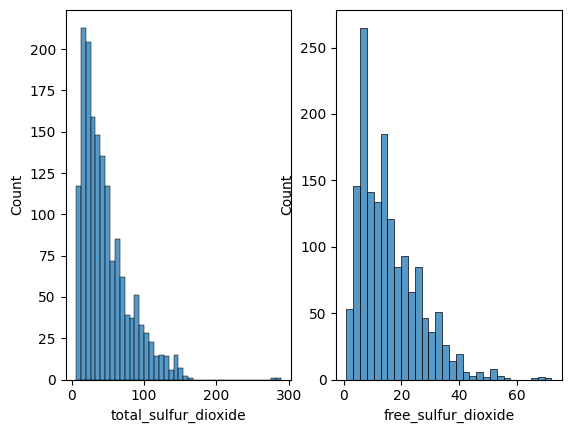

In [ ]:
plt.subplot(1,2,1)
sns.histplot(df.total_sulfur_dioxide)

plt.subplot(1,2,2)
sns.histplot(df.free_sulfur_dioxide)

In [ ]:
# 1 Duplicados
df.duplicated().sum()

np.int64(0)

In [96]:
# Elimina duplicados
df = df.drop_duplicates()

# Verificamos de nuevo
print("Duplicados después de limpieza:", df.duplicated().sum())

Duplicados después de limpieza: 0


In [97]:
# 3. Mayor variabilidad
variabilidad = df.describe().loc['std'].sort_values(ascending=False).head(2)
print("\n3) Variables con más variabilidad:\n", variabilidad)


3) Variables con más variabilidad:
 total_sulfur_dioxide    33.408946
free_sulfur_dioxide     10.447270
Name: std, dtype: float64


In [98]:
# 4. Media y mediana de alcohol
mean_alcohol = df["alcohol"].mean()
median_alcohol = df["alcohol"].median()
print("\n4) Alcohol -> Media:", round(mean_alcohol, 2), "Mediana:", round(median_alcohol, 2))


4) Alcohol -> Media: 10.43 Mediana: 10.2


#### Chequear Outliers

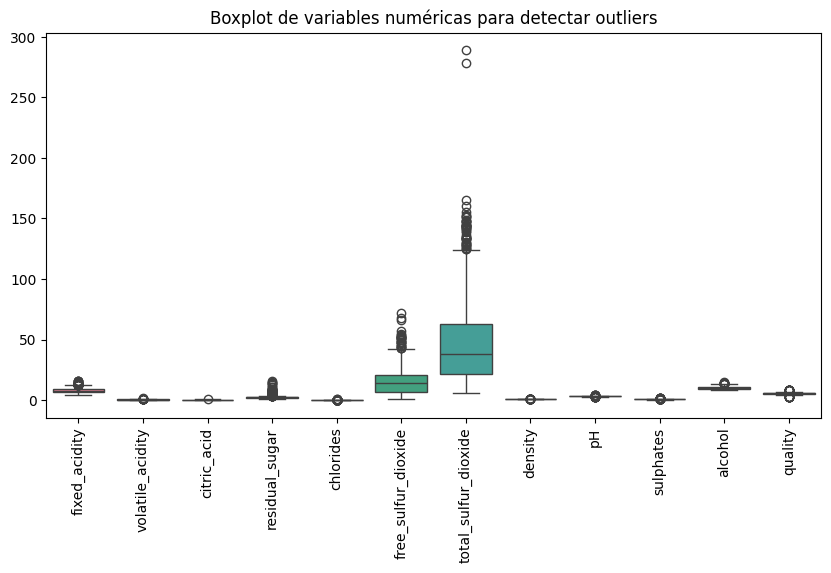

In [100]:
# 4. Aplicar transformaciones a las variables numéricas
# 4.1. Chequeo de outliers con boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.select_dtypes(include=["number"]))
plt.xticks(rotation=90) #Para que se vean los titulos
plt.title("Boxplot de variables numéricas para detectar outliers")
plt.show()

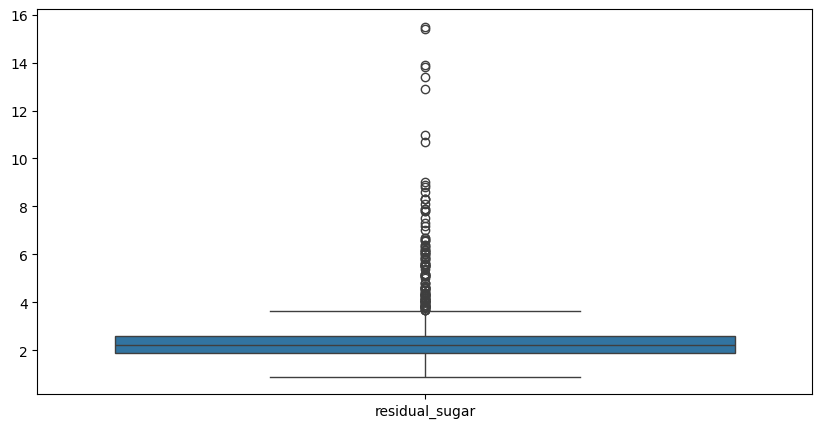

In [101]:
# Podéis hacerlo de una sola variable
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["residual_sugar"]])
plt.show()

#### Quitar outliers

P1: 1.4  | P99: 8.3
Total de outliers en residual sugar: 25
Tamaño original: (1359, 12)
Tamaño sin outliers (1%-99%): (1334, 12)


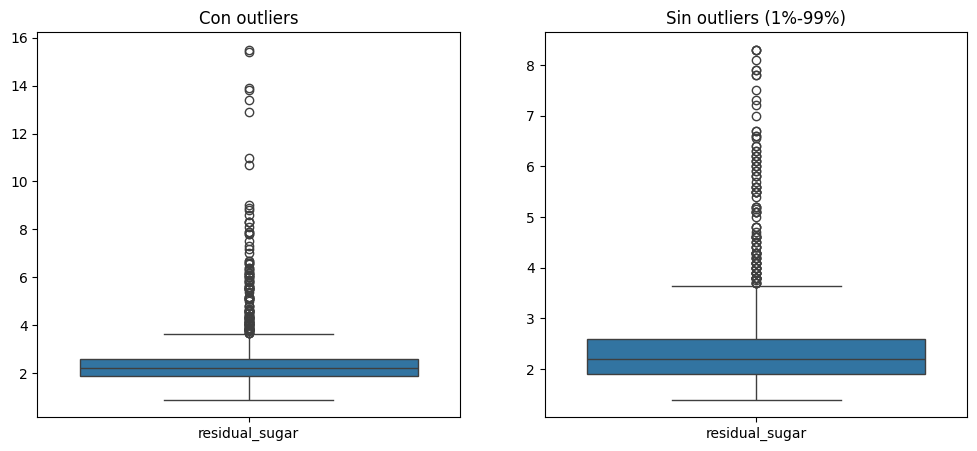

In [106]:
# 5 Outliers en residual sugar (1% y 99%)
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular percentiles 1% y 99%
q1 = df["residual_sugar"].quantile(0.01)
q99 = df["residual_sugar"].quantile(0.99)

print("P1:", q1, " | P99:", q99)

# Filtrar outliers (los extremos)
outliers = df[(df["residual_sugar"] < q1) | (df["residual_sugar"] > q99)]
print("Total de outliers en residual sugar:", outliers["residual_sugar"].count())

# Crear df_clean2 SIN outliers
df_clean2 = df[(df["residual_sugar"] >= q1) & (df["residual_sugar"] <= q99)]

print("Tamaño original:", df.shape)
print("Tamaño sin outliers (1%-99%):", df_clean2.shape)

# Visualizar comparación con boxplots
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df[["residual_sugar"]])
plt.title("Con outliers")

plt.subplot(1,2,2)
sns.boxplot(data=df_clean2[["residual_sugar"]])
plt.title("Sin outliers (1%-99%)")

plt.show()
df = df_clean2

In [109]:
# 6. Categorías de calidad
df["quality_group"] = pd.cut(df["quality"], bins=[0,4,6,10],
                             labels=["bajo","medio","alto"])
print("\n6) Distribución por grupos de calidad:\n", df["quality_group"].value_counts())


6) Distribución por grupos de calidad:
 quality_group
medio    1093
alto      181
bajo       60
Name: count, dtype: int64


/tmp/ipykernel_3845/327547346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["quality_group"] = pd.cut(df["quality"], bins=[0,4,6,10],


In [110]:
# 7. Correlación alcohol - quality
corr_alcohol_quality = df["alcohol"].corr(df["quality"])
print("\n7) Correlación alcohol-quality:", round(corr_alcohol_quality, 3))


7) Correlación alcohol-quality: 0.483


In [111]:
# 8. Correlación density - alcohol
corr_density_alcohol = df["density"].corr(df["alcohol"])
print("\n8) Correlación density-alcohol:", round(corr_density_alcohol, 3))
print("Interpretación: densidad y alcohol están inversamente relacionados (a más alcohol, menor densidad).")



8) Correlación density-alcohol: -0.495
Interpretación: densidad y alcohol están inversamente relacionados (a más alcohol, menor densidad).


In [114]:
# 9. Nueva columna ratio
df["alcohol_sugar_ratio"] = df["alcohol"] / df["residual_sugar"]
top_ratio = df.sort_values("alcohol_sugar_ratio", ascending=False).head(5)
print("\n9) Vinos con mayor alcohol_sugar_ratio:\n", top_ratio[["alcohol","residual_sugar","alcohol_sugar_ratio"]])



9) Vinos con mayor alcohol_sugar_ratio:
       alcohol  residual_sugar  alcohol_sugar_ratio
390      12.9             1.4             9.214286
1122     12.3             1.4             8.785714
1270     14.0             1.6             8.750000
1298     12.2             1.4             8.714286
354      11.9             1.4             8.500000


/tmp/ipykernel_3845/130723282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alcohol_sugar_ratio"] = df["alcohol"] / df["residual_sugar"]


In [115]:
# 10. Variable más importante para predecir calidad (correlación más alta con quality)
correlaciones = df.corr(numeric_only=True)["quality"].abs().sort_values(ascending=False)
print("\n10) Variables más correlacionadas con quality:\n", correlaciones.head(3))


10) Variables más correlacionadas con quality:
 quality             1.000000
alcohol             0.482926
volatile_acidity    0.400042
Name: quality, dtype: float64


In [116]:
# 11. Proporción de vinos con pH < 3.2
prop_ph = (df["pH"] < 3.2).mean()
print("\n11) Proporción pH < 3.2:", round(prop_ph*100, 2), "%")


11) Proporción pH < 3.2: 21.96 %


In [119]:
# 12. Fixed acidity fuera de rango
outliers_acidity = df[(df["fixed_acidity"] < 5) | (df["fixed_acidity"] > 15)]
print("\n12) Fixed acidity fuera de 5-15:", outliers_acidity.shape[0])
print("Sugerencia: revisar si son errores o valores extremos válidos; podrían eliminarse si afectan el modelo.")



12) Fixed acidity fuera de 5-15: 7
Sugerencia: revisar si son errores o valores extremos válidos; podrían eliminarse si afectan el modelo.


In [120]:
# 13. Estrategia de imputación citric acid
print("\n13) Citric acid imputación -> Usaría la mediana (menos sensible a outliers que la media).")



13) Citric acid imputación -> Usaría la mediana (menos sensible a outliers que la media).


In [121]:
# 14. Quality binaria (bueno/no bueno)
df["quality_bin"] = df["quality"].apply(lambda x: "bueno" if x>=7 else "no bueno")
prop_buenos = (df["quality_bin"]=="bueno").mean()
print("\n14) Proporción vinos buenos:", round(prop_buenos*100, 2), "%")


14) Proporción vinos buenos: 13.57 %


/tmp/ipykernel_3845/3667224707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["quality_bin"] = df["quality"].apply(lambda x: "bueno" if x>=7 else "no bueno")


In [122]:
# 15. Variables a descartar o transformar
print("\n15) Sugerencias:")
print("- Descartar: 'residual sugar' si hay demasiados outliers sin relación fuerte con quality.")
print("- Transformar: 'density', 'alcohol_sugar_ratio', log-transform a 'residual sugar'.")
print("- Escalar variables con diferentes escalas (StandardScaler/MinMaxScaler).")


15) Sugerencias:
- Descartar: 'residual sugar' si hay demasiados outliers sin relación fuerte con quality.
- Transformar: 'density', 'alcohol_sugar_ratio', log-transform a 'residual sugar'.
- Escalar variables con diferentes escalas (StandardScaler/MinMaxScaler).


### X-y SPLIT

In [46]:
# 2. Separar la variable objetivo ('quality') y las variables predictoras (X-y SPLIT)




### Separar numéricas y categóricas

In [47]:
# 3. Separar variables numéricas y categóricas
numericas = X.select_dtypes(include=["number"]).columns.tolist()
categoricas = X.select_dtypes(exclude=["number"]).columns.tolist()

NameError: name 'X' is not defined

In [ ]:
# OPCION 2!!! (Quizás más recomendable)
numericas_df = X.select_dtypes(include=["number"])
categoricas_df = X.select_dtypes(exclude=["number"])

### TRANSFORMACIONES NUMÉRICAS

#### Standarizacion y Normalizacion

In [ ]:
# 2. StandardScaler
scaler = StandardScaler()
df_filtered['total_sulfur_dioxide_scaled'] = scaler.fit_transform(df_filtered[['total_sulfur_dioxide']].fillna(0))
plt.subplot(1, 2, 1)
sns.histplot(df_filtered['total_sulfur_dioxide_scaled'], kde=True, color='green', bins=50)
plt.title("Distribución después de StandardScaler")
plt.xlabel("total_sulfur_dioxide (Standard Scaled)")
plt.ylabel("Frecuencia")

# 3. MinMaxScaler
minmax_scaler = MinMaxScaler()
df_filtered['total_sulfur_dioxide_minmax'] = minmax_scaler.fit_transform(df_filtered[['total_sulfur_dioxide']].fillna(0))
plt.subplot(1, 2, 2)
sns.histplot(df_filtered['total_sulfur_dioxide_minmax'], kde=True, color='orange', bins=50)
plt.title("Distribución después de MinMaxScaler")
plt.xlabel("total_sulfur_dioxide (Min-Max Scaled)")
plt.ylabel("Frecuencia")

#### Transformacion logaritmica

In [ ]:
# Dibujemos su distribucion (Continuas --> HISTOGRAMA)
plt.figure(figsize=(15, 10))
sns.histplot(X['residual_sugar'].dropna(), kde=True, color='blue', bins=50)

In [ ]:
# 4.2. Aplicar transformación logarítmica a una variable sesgada (ejemplo: 'residual sugar')
X["residual_sugar_log"] = np.log1p(X["residual_sugar"])  # log(1+x) para evitar log(0)
X.head()

In [ ]:
# Comparemos su distribucion con la transformada (Continuas --> HISTOGRAMA)
plt.figure(figsize=(15, 10))
sns.histplot(X['residual_sugar_log'].dropna(), kde=True, color='blue', bins=50)

#### Binning

In [ ]:
# 4.4. Discretización de una variable numérica (ejemplo: 'alcohol')
# Nota: Este dataset no contiene variables categóricas originales, pero podemos crear una para demostración
X["alcohol_binned"] = pd.cut(X["alcohol"], bins=3, labels=["Bajo", "Medio", "Alto"]) # Bins tambien puede ser una lista
X.sample(10)

### CODIFICACIÓN CATEGÓRICAS

In [ ]:
cat_df = X[["alcohol_binned"]]
cat_df.head()

In [ ]:
# 5.1. Label Encoding con .map() Bajo que sea 0, Medio 1 y Alto 2. Hazlo en cat_df!!!!!!!



In [ ]:
# 5.2. Aplicar encoding con apply + lambda. Haz lo mismo pero de otra manera!!



In [ ]:
cat_df.sample(10)

In [ ]:
# 5.3. One-hot encoding con pandas
dummie_df = pd.get_dummies(X[["alcohol_binned"]], columns=["alcohol_binned"], drop_first=True)
dummie_df

In [ ]:
dummie_df = dummie_df.astype(int)
dummie_df

In [ ]:
# 5.4. One-hot encoding con OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cat = encoder.fit_transform(X[["alcohol_binned"]])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(["alcohol_binned"]))
encoded_cat_df